# Clustering
[Source](https://scikit-learn.org/stable/modules/clustering.html)
### Many different algortihms with very different results
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

### Part 1
##### When doing these exercises print your data often to see what you get from the algorithms
1. Create a synthetic dataset with sklearn.datasets.make_classification
  - `X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)`
  - X represents the 2 features in a list
  - y represents the classification label for each feature set


In [38]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

#### 2. Based on the labels scatter plot each of the 1000 entries in one of 2 different colors

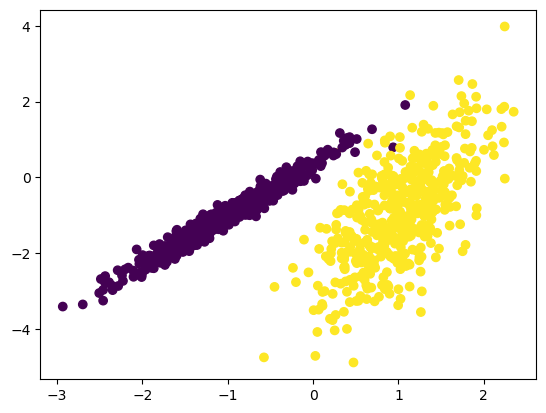

In [39]:
# Correct way, with colors
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)

#### 3. Now without knowing the labels (we do know them ofcourse) we will try different algorithms on the data
    - import AffinityPropagation from sklearn.cluster 
    - Create a model: `model = AffinityPropagation(damping=0.7)`
    - Fit the model with the data from the features (X): `model.fit(X)`
    - And assign cluster to each sample: `p=model.predict(X)`
    - Find the unique clusters with `np.unique()` method
    - Scatterplot each sample, colored by its cluster
    - Compare with the scatterplot of the actual classifications


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


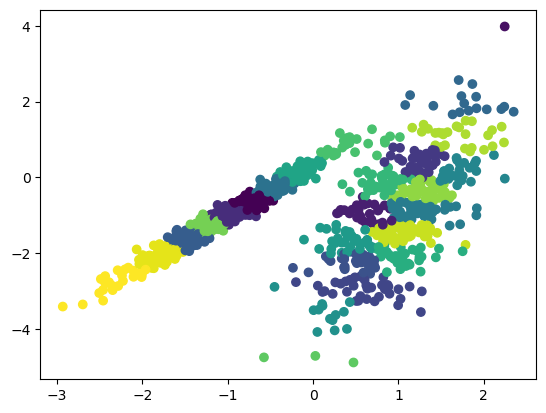

In [41]:
from sklearn.cluster import AffinityPropagation 

affinity = AffinityPropagation(damping=0.7)
affinity_p = affinity.fit_predict(X)
unique = np.unique(affinity_p)
print(unique)

plt.scatter(X[:,0], X[:,1], c=affinity_p)

#### 4. Try with cluster algorithm: [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
    - Use the documentation to create DBSCAN clusters for the feature samples
    - Scatter plot the result


In [44]:
def findOptimalEps(n_neighbors, data):
    '''
    function to find optimal eps distance when using DBSCAN; based on this article: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
    '''
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

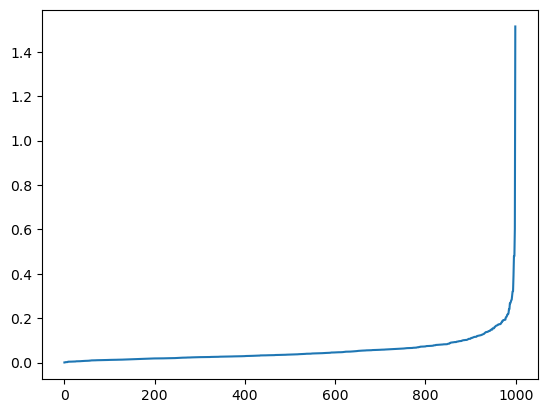

In [45]:
findOptimalEps(2, X)

In [71]:
from sklearn.cluster import DBSCAN
import numpy as np
#X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])

clustering = DBSCAN(eps=0.1, min_samples=2).fit(X)
#clustering.labels_



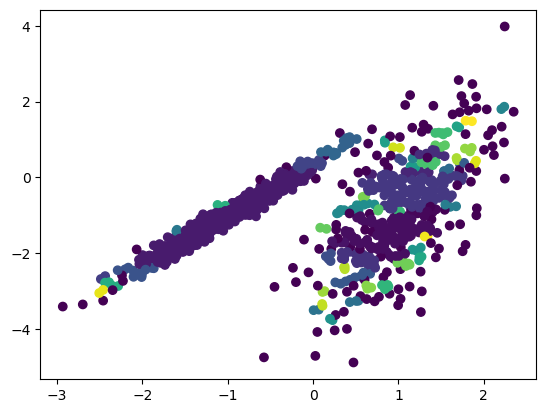

In [72]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)

#### 5. Do the same with [MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

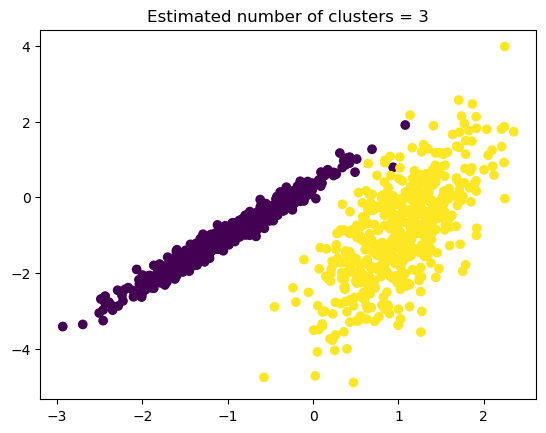

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=1000)

# Fit Mean Shift with Scikit
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X)
labels = meanshift.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# Predict the cluster for all the 
P = meanshift.predict(X)

plt.scatter(X[:,0], X[:,1], c=y)
plt.title(f'Estimated number of clusters = {n_clusters_}')
#plt.xlabel('Temperature yesterday')
#plt.ylabel('Temperature today')
plt.show()

#### 6. Finally do it with the the [Birch algortihm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html)
    - You could try to with the 
    [Gaussian Mixture algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)


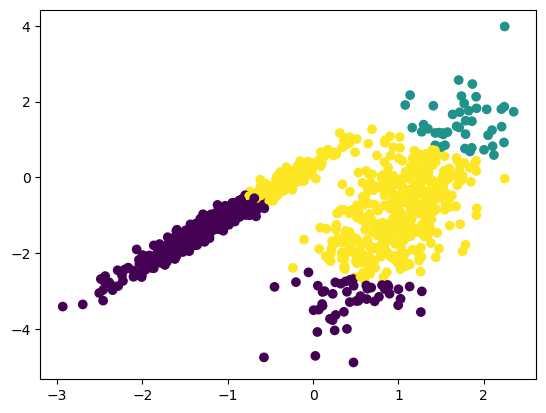

In [87]:
from sklearn.cluster import Birch

bclust=Birch().fit(X)
labels = bclust.predict(X) 
 

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show() 



### Part 2
Code along and follow the steps in [this tutorial](https://programminghistorian.org/en/lessons/clustering-with-scikit-learn-in-python#1-loading-the-dataset--exploratory-data-analysis) to use DBSCAN clustering algorithm on articles to try and categorise them into topics. HINT: Install Spacy with following command `!pip install -U pip setuptools wheel && pip install -U spacy && python -m spacy download en_core_web_sm`

[Find more about NLP with Spacy here](https://spacy.io/usage/spacy-101)

**What is Lemmatization? Assigning the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”.**

For PCA use this import: `from sklearn.decomposition import PCA` (dimensionality reduction)
For K-Means clustering algorithm: `from sklearn.cluster import KMeans, DBSCAN`

Create a function that can take a cluster number and return all titles in that cluster. Do you see any pattern?

In [1]:
!pip install -U pip setuptools wheel && pip install -U spacy && python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.4.0
    Uninstalling setuptools-65.4.0:
      Successfully uninstalled setuptools-65.4.0
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 7.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.5/806.5 kB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 724.2 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.4 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Case Study: Clustering Textual Data
### 1. Loading the Dataset & Exploratory Data Analysis1-loading-the-dataset--exploratory-data-analysis
Using a similar method as that used to analyze the DNP_ancient_authors.csv dataset, we will first load the RELIGION_abstracts.csv into our program and look at some summary statistics.

In [16]:
from sklearn.preprocessing import StandardScaler as SS # z-score standardization 
from sklearn.cluster import KMeans, DBSCAN # clustering algorithms
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.metrics import silhouette_score # used as a metric to evaluate the cohesion in a cluster
from sklearn.neighbors import NearestNeighbors # for selecting the optimal eps value when using DBSCAN
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
#from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
import pandas as pd

df_abstracts = pd.read_csv("../data/RELIGION_abstracts.csv").drop(columns="Unnamed: 0")
df_abstracts.info()
df_abstracts.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     701 non-null    object
 1   abstract  701 non-null    object
 2   link      701 non-null    object
 3   volume    701 non-null    object
dtypes: object(4)
memory usage: 22.0+ KB


,title,abstract,link,volume
count,701,701,701,701
unique,701,701,701,40
top,Norwegian Muslims denouncing terrorism: beyond...,"In contemporary European societies, Muslims ar...",https://www.tandfonline.com/doi/full/10.1080/0...,https://www.tandfonline.com/loi/rrel20?treeId=...
freq,1,1,1,41


### Optional Step: Lemmatization

In [4]:
# lemmatization (optional step)
import spacy
import re
nlp = spacy.load("en_core_web_sm")

def lemmatizeAbstracts(x):
        doc = nlp(x)
        new_text = []
        for token in doc:
            new_text.append(token.lemma_)
        text_string = " ".join(new_text)
        # getting rid of non-word characters
        text_string = re.sub(r"[^\w\s]+", "", text_string)
        text_string = re.sub(r"\s{2,}", " ", text_string)
        return text_string

df_abstracts["abstract_lemma"] = df_abstracts["abstract"].apply(lemmatizeAbstracts)
df_abstracts.to_csv("../data/RELIGION_abstracts_lemmatized.csv")

2022-10-25 19:24:37.577788: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 19:24:37.697865: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-25 19:24:37.697890: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-25 19:24:37.725977: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-25 19:24:38.487645: W tensorflow/stream_executor/platform/de

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english")
df_abstracts_tfidf = tfidf.fit_transform(df_abstracts["abstract_lemma"])

In [9]:
df_abstracts_tfidf

<701x8224 sparse matrix of type '<class 'numpy.float64'>'
	with 40605 stored elements in Compressed Sparse Row format>

### TF-IDF Vectorization

In [10]:
# creating a new TF-IDF matrix
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=250, strip_accents="unicode", min_df=10, max_df=200)
tfidf_religion_array = tfidf.fit_transform(df_abstracts["abstract_lemma"])
df_abstracts_tfidf = pd.DataFrame(tfidf_religion_array.toarray(), index=df_abstracts.index, columns=tfidf.get_feature_names())
df_abstracts_tfidf.describe()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,academic,account,activity,address,african,agency,aim,allow,american,analyse,...,use,value,various,view,way,western,woman,work,world,year
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,...,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,0.017407,0.017756,0.010633,0.011059,0.011356,0.009061,0.010451,0.009127,0.015210,0.011713,...,0.033074,0.014268,0.013633,0.021310,0.027744,0.021257,0.018406,0.028048,0.028877,0.014563
std,0.063839,0.067667,0.051894,0.047114,0.065659,0.053946,0.045080,0.042445,0.068153,0.051143,...,0.074190,0.061468,0.052642,0.064568,0.062593,0.078245,0.095377,0.074917,0.073751,0.052971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.493789,0.709637,0.509307,0.360085,0.737092,0.658383,0.359469,0.409185,0.617276,0.457299,...,0.609089,0.828761,0.534004,0.515410,0.364839,0.724760,0.941362,0.604694,0.492094,0.365748


### Dimensionality Reduction Using PCA

In [17]:
#from sklearn.decomposition import PCA # dimensionality reduction
# using PCA to reduce the dimensionality
pca = PCA(n_components=10, whiten=False, random_state=42)
abstracts_pca = pca.fit_transform(df_abstracts_tfidf)
df_abstracts_pca = pd.DataFrame(data=abstracts_pca)

## Applying K-Means Clustering on Textual Data

In [18]:
kmeans = KMeans(n_clusters=100, random_state=42)
abstracts_labels = kmeans.fit_predict(df_abstracts_pca)
df_abstracts_labeled = df_abstracts.copy()
df_abstracts_labeled["cluster"] = abstracts_labels

In [19]:
df_abstracts_labeled

,title,abstract,link,volume,abstract_lemma,cluster
0,Norwegian Muslims denouncing terrorism: beyond...,"In contemporary European societies, Muslims ar...",https://www.tandfonline.com/doi/full/10.1080/0...,https://www.tandfonline.com/loi/rrel20?treeId=...,in contemporary european society Muslims be of...,25
1,A comparative analysis of three Sunni Muslim o...,The distinction between ‘moderate’ and ‘radica...,https://www.tandfonline.com/doi/full/10.1080/0...,https://www.tandfonline.com/loi/rrel20?treeId=...,the distinction between moderate and radical I...,25
2,Musical negotiations of a ‘moderate’ versus a ...,"This article explores how in Morocco, music is...",https://www.tandfonline.com/doi/full/10.1080/0...,https://www.tandfonline.com/loi/rrel20?treeId=...,this article explore how in Morocco music be u...,25
3,Aesthetics of authority: ‘Islam Nusantara’ and...,"In Indonesia, Islamic ‘counter-terror culture’...",https://www.tandfonline.com/doi/full/10.1080/0...,https://www.tandfonline.com/loi/rrel20?treeId=...,in Indonesia islamic counter terror culture co...,25
4,Countering ‘Islamic’ violent extremism? The im...,This article explores how Muslim-led civil soc...,https://www.tandfonline.com/doi/full/10.1080/0...,https://www.tandfonline.com/loi/rrel20?treeId=...,this article explore how Muslim lead civil soc...,25
...,...,...,...,...,...,...
696,Are psychological studies of religion on the r...,Researchers in psychology of religion in Ameri...,https://www.tandfonline.com/doi/abs/10.1016/00...,https://www.tandfonline.com/loi/rrel20?treeId=...,researcher in psychology of religion in Americ...,70
697,The Ismaili sect in London: Religious institut...,The Ismailis in London are a community attempt...,https://www.tandfonline.com/doi/abs/10.1016/00...,https://www.tandfonline.com/loi/rrel20?treeId=...,the Ismailis in London be a community attempt ...,66
698,Dialogue and faith,‘Dialogue’ between members of differing tradit...,https://www.tandfonline.com/doi/abs/10.1016/00...,https://www.tandfonline.com/loi/rrel20?treeId=...,dialogue between member of differing traditio...,93
699,Short review and book note,"Thausing, Gertrude, Sein und werden, Acta Ethn...",https://www.tandfonline.com/doi/abs/10.1016/00...,https://www.tandfonline.com/loi/rrel20?treeId=...,thausing Gertrude Sein und werden Acta Ethnolo...,62


#### We will next evaluate the results by printing out some article titles of randomly chosen clusters. For instance, when analyzing the titles in cluster 75, we can perceive that all articles in this cluster are related to Theravāda Buddhism, Karma, and their perception in “the West”:

In [20]:
df_abstracts_labeled[df_abstracts_labeled["cluster"] == 75][["title", "cluster"]]

,title,cluster
28,The space between us: considering online media...,75
39,Towards increasing diversity in the study of r...,75
61,"Qur’anic terminology, translation, and the Isl...",75
88,From nation-state to market: The transformatio...,75
243,"More than belief, but not more than belief and...",75
279,The role of evolutionary psychology within an ...,75
389,A case of misrepresentation: James L. Cox and ...,75
436,Epidemiology and the study of religion,75
682,The theological enemies of religious studies,75


#### Cluster 15 includes articles related to the body and its destruction:

In [23]:
df_abstracts_labeled[df_abstracts_labeled["cluster"] == 15][["title", "cluster"]]

,title,cluster
8,Engineering self and civil society: the promis...,15
139,Contemporary fantasy fiction and representatio...,15
152,Socialist religion and the emergence of occult...,15
474,Orisha Worship Communities: A Reconsideration ...,15
609,Cultural continuity and cultural hegemony: Ita...,15


#### To be fair, other clusters are harder to interpret. A good example is cluster 84. Yet, even in the case of cluster 84 there still seems to be a pattern, namely that almost all articles are related to famous scholars and works in the study of religion, such as Durkheim, Tylor, Otto, Said, etc.

In [24]:
df_abstracts_labeled[df_abstracts_labeled["cluster"] == 84][["title", "cluster"]]

,title,cluster
58,The promise of the universal: non-Buddhists’ a...,84
246,Where angels fear to tread: neurophenomenology...,84
275,On the market: consumption and material cultur...,84
624,Contemporary Theravāda and Zen Buddhist attitu...,84


## Applying DBSCAN Clustering on Textual Data
Even though the k-means clustering of our data already resulted in some valuable insights, it might still be interesting to apply a different clustering algorithm such as DBSCAN. As explained above, DBSCAN excludes noise points and outliers in our data, meaning that it focuses on those regions in our data that may rightfully be called dense.

In [3]:
def findOptimalEps(n_neighbors, data):
    '''
    function to find optimal eps distance when using DBSCAN; based on this article: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
    '''
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

In [4]:
findOptimalEps(2, df_abstracts_tfidf)

NameError: name 'df_abstracts_tfidf' is not defined

In [28]:
dbscan = DBSCAN(eps=0.2, metric="euclidean")
dbscan_labels = dbscan.fit_predict(df_abstracts_pca)
df_abstracts_dbscan = df_abstracts.copy()
df_abstracts_dbscan["cluster"] = dbscan_labels
df_abstracts_dbscan["cluster"].unique()

array([ 0,  1, -1,  2,  3])

In [29]:
df_abstracts_dbscan[df_abstracts_dbscan["cluster"] == 1][["title", "cluster"]]

,title,cluster
14,Imagining Buddhist modernism: the shared relig...,1
20,Why Durkheim really thought that Buddhism was ...,1
158,Textbook Buddhism: introductory books on the B...,1
439,Recent trends in Sri Lankan Buddhism,1
471,William James and Buddhism: American Pragmatis...,1
559,Buddhist Environmental Ethics and Detraditiona...,1
620,Buddhadharma and contemporary ethics,1
631,How environmentalist is Buddhism?,1
638,Protestant Buddhism?,1
690,Burial ‘ad sanctos’ and the physical presence ...,1


In [30]:
df_abstracts_dbscan[df_abstracts_dbscan["cluster"] == 2][["title", "cluster"]]

,title,cluster
288,Wither or whither: the study of religion at th...,2
289,Contextualization of Religious Studies and of ...,2
584,The academic study of Buddhism in the United S...,2
681,Postulations for safeguarding preconceptions: ...,2
